In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#Visiulazation
import matplotlib.pyplot as plt
#image processing
import cv2
#extracting zippped file
import tarfile


In [17]:
import numpy as np 
import imageio
import matplotlib.pyplot as plt
from PIL import Image

In [19]:
im1 = imageio.imread('take-min.jpg')
print(im1.shape)

(638, 638, 3)


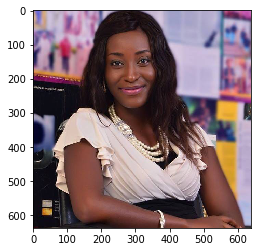

In [20]:
plt.imshow(im1)
plt.show()

In [25]:
def show_image(image):
    plt.figure(figsize=(8,5))
    #Before showing image, bgr color order transformed to rgb order
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.xticks([])
    plt.yticks([])
    plt.show()
    

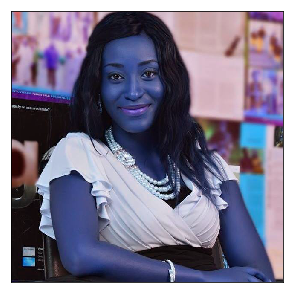

In [26]:
show_image(im1)

In [28]:
def face_detection(img):
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    print('Number of faces detected:', len(faces))
        
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        #img = img[y:y+h, x:x+w] # for cropping
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return cv_rgb

#imgg2=cv2.imread("/kaggle/i

Number of faces detected: 1


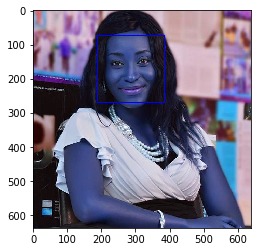

In [29]:
a=face_detection(im1)
plt.imshow(a)
plt.show() 

Number of faces detected: 2


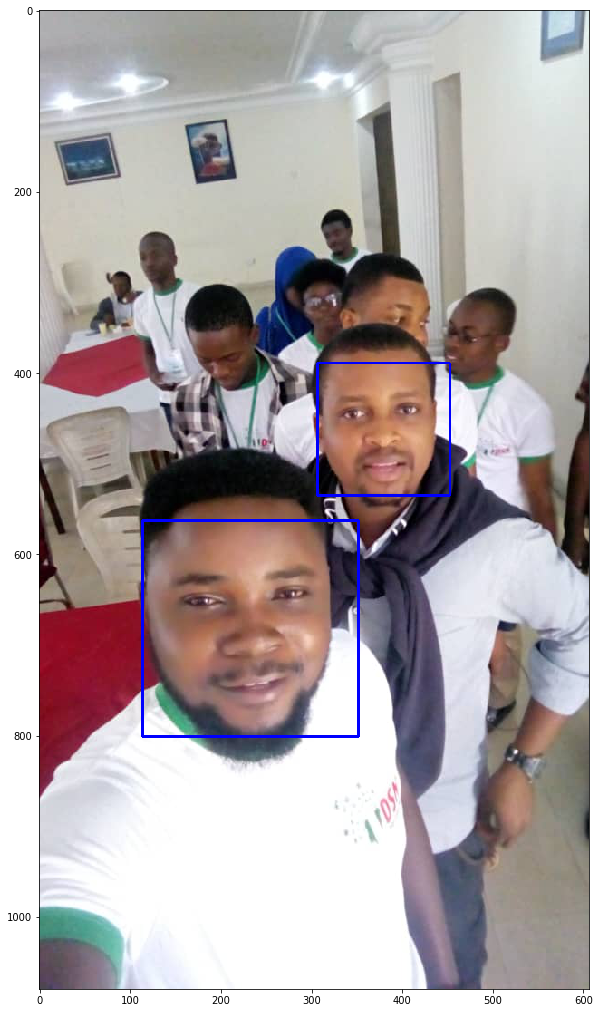

In [55]:
plt.figure(figsize=(12,18))
img=cv2.imread("great.jpg")
c=face_detection(img)
plt.imshow(c)
plt.show()

In [33]:
modelFile = "140000_fp16.caffemodel"
configFile = "deploy.prototxt"
net = cv2.dnn.readNetFromCaffe(configFile, modelFile)

In [35]:
#gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
# multiple faces needs increasing the size of image as well as multiple detections
def nfaces_dnn(img):
    blob = cv2.dnn.blobFromImage(img, 1.2, (1200,1200), [104, 117, 123], False, False) #
    # params: source, scale=1, size=300,300, mean RGB values (r,g,b), rgb swapping=false, crop = false
    conf_threshold=0.6 # confidence at least 60%
    frameWidth=img.shape[1] # get image width
    frameHeight=img.shape[0] # get image height
    net.setInput(blob)
    detections = net.forward()
  
    bboxes = []
    
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > conf_threshold:
                  
            x1 = int(detections[0, 0, i, 3] * frameWidth)
            y1 = int(detections[0, 0, i, 4] * frameHeight)
            x2 = int(detections[0, 0, i, 5] * frameWidth)
            y2 = int(detections[0, 0, i, 6] * frameHeight)
            cv2.rectangle(img,(x1,y1),(x2,y2),(255,255,0),2)
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return cv_rgb

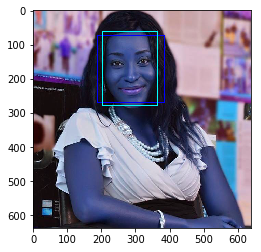

In [36]:
a=face_dnn(im1)
plt.imshow(a)
plt.show() 

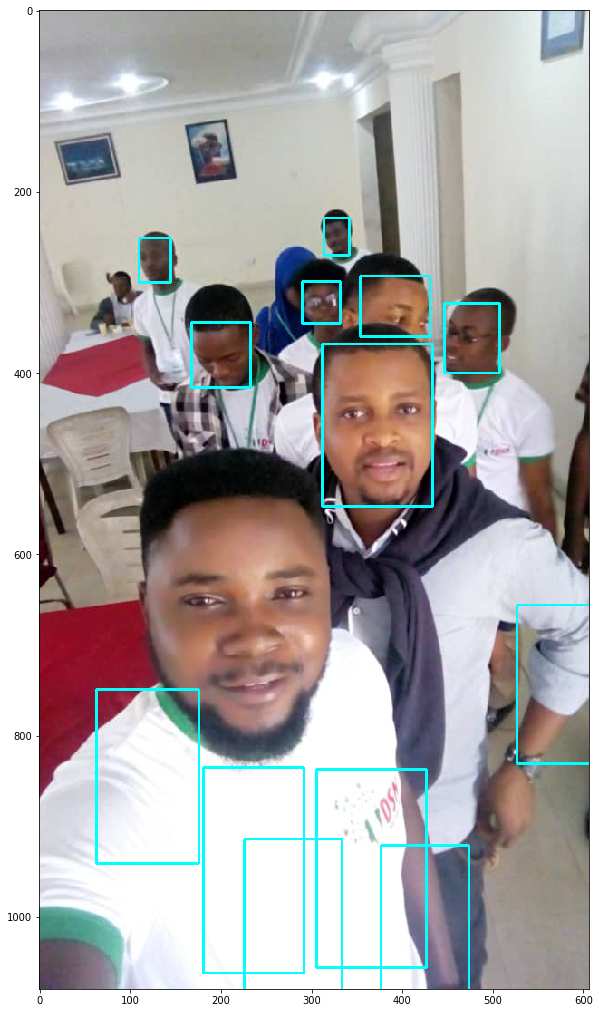

In [37]:
img=cv2.imread("great.jpg")
c=nfaces_dnn(img)
plt.figure(figsize=(15,18))
plt.imshow(c)
plt.show()



In [51]:
import os
print(os.getcwd())

/home/nbuser/library
